In [3]:
# from https://www.kaggle.com/carlbeckerling/kaggle-titanic-tutorial
import pandas as pd

test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')
test.shape,train.shape

((418, 11), (891, 12))

In [8]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float6

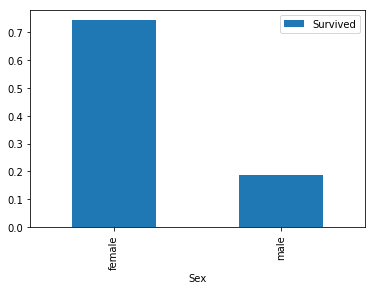

In [10]:
import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index='Sex', values='Survived')
sex_pivot.plot.bar()
plt.show()

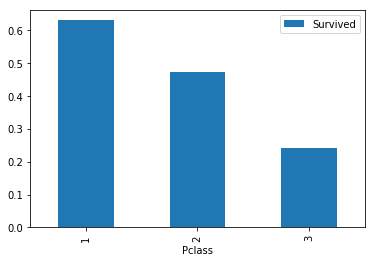

In [11]:
class_pivot = train.pivot_table(index='Pclass', values='Survived')
class_pivot.plot.bar()
plt.show()

In [14]:
train["Pclass"].unique()

array([3, 1, 2])

In [15]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
train['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

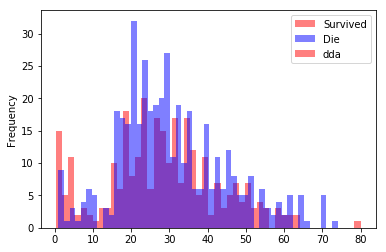

In [19]:
survived = train[train['Survived'] == 1]
died = train[train['Survived'] == 0]
survived['Age'].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5, color='blue', bins=50)
plt.legend(['Survived', 'Die','dda'])
plt.show()

In [22]:
def process_age(df, cut_points, label_names):
    df['Age'] = df['Age'].fillna(-0.5)
    df['Age_categories'] = pd.cut(df["Age"], cut_points, labels=label_names)
    return df

cut_points = [-1, 0, 18, 100]
label_names = ['Missing', 'Child', 'Adult']

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

In [48]:
train['Age_categories'].describe()
holdout = process_age(holdout, [-1,0,5,12,18,35,60,100],['Missing','Infant','Child','Teenage', 'Young', 'Adult', 'Senior'])

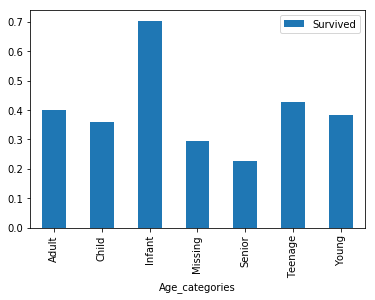

In [28]:
train = process_age(train, [-1,0,5,12,18,35,60,100],['Missing','Infant','Child','Teenage', 'Young', 'Adult', 'Senior'])
age_categories_pivot = train.pivot_table(index='Age_categories', values='Survived')
age_categories_pivot.plot.bar()
plt.show()

In [29]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummies], axis=1)
    return df

train = create_dummies(train, 'Pclass')
test  = create_dummies(test, 'Pclass')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young,0,0,1


In [30]:
train = create_dummies(train, 'Sex')
test  = create_dummies(test, 'Sex')


train = create_dummies(train, 'Age_categories')
test  = create_dummies(test,  'Age_categories')

train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Adult,Age_categories_Child,Age_categories_Missing
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Adult,0,0,1,0,1,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult,0,0,1,1,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Adult,0,1,0,0,1,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Adult,0,0,1,0,1,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Adult,0,0,1,1,0,1,0,0


# creating learning model

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

columns = ['Pclass_2','Pclass_3', 'Sex_male']
lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 
          'Age_categories_Missing', 'Age_categories_Infant',
          'Age_categories_Child', 'Age_categories_Teenage',
          'Age_categories_Young', 'Age_categories_Adult',
          'Age_categories_Senior']

lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# splitting training data

In [34]:
holdout = test

from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 
          'Age_categories_Missing', 'Age_categories_Infant',
          'Age_categories_Child', 'Age_categories_Teenage',
          'Age_categories_Young', 'Age_categories_Adult',
          'Age_categories_Senior']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2, random_state=0)

In [38]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)

In [40]:
accuracy

0.81005586592178769

In [41]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, predictions)
pd.DataFrame(conf_matrix, columns=[['Survived', 'Died']], index=[['Survived', 'Died']])

,Survived,Died
Survived,96,14
Died,20,49


In [42]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
np.mean(scores)

0.80246708659630017

In [52]:
holdout = process_age(holdout, [-1,0,5,12,18,35,60,100],['Missing','Infant','Child','Teenage', 'Young', 'Adult', 'Senior'])
holdout

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Adult,Age_categories_Child,Age_categories_Missing
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young,0,0,1,0,1,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult,0,0,1,1,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior,0,1,0,0,1,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young,0,0,1,0,1,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Young,0,0,1,1,0,1,0,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Teenage,0,0,1,0,1,0,1,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Young,0,0,1,1,0,1,0,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Young,0,1,0,0,1,1,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Teenage,0,0,1,1,0,0,1,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Young,0,0,1,0,1,1,0,0


In [53]:
columns

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Age_categories_Missing',
 'Age_categories_Infant',
 'Age_categories_Child',
 'Age_categories_Teenage',
 'Age_categories_Young',
 'Age_categories_Adult',
 'Age_categories_Senior']

In [63]:
lr = LogisticRegression()
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])
holdout_predictions

KeyError: "['Age_categories_Missing' 'Age_categories_Child' 'Age_categories_Adult'] not in index"

In [62]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenage',
       'Age_categories_Young', 'Age_categories_Adult',
       'Age_categories_Senior']
holdout = holdout.drop(['Age_categories_Adult','Age_categories_Child', 'Age_categories_Missing'], axis=1)

In [56]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young,0,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Young,0,0,1,1,0


In [58]:
holdout['Age_categories'].unique()

[Young, Adult, Senior, Teenage, Missing, Child, Infant]
Categories (7, object): [Adult < Child < Infant < Missing < Senior < Teenage < Young]

In [79]:
holdout = create_dummies(holdout, 'Age_categories')

In [80]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 24 columns):
PassengerId               418 non-null int64
Pclass                    418 non-null int64
Name                      418 non-null object
Sex                       418 non-null object
Age                       418 non-null float64
SibSp                     418 non-null int64
Parch                     418 non-null int64
Ticket                    418 non-null object
Fare                      417 non-null float64
Cabin                     91 non-null object
Embarked                  418 non-null object
Age_categories            418 non-null category
Pclass_1                  418 non-null uint8
Pclass_2                  418 non-null uint8
Pclass_3                  418 non-null uint8
Sex_female                418 non-null uint8
Sex_male                  418 non-null uint8
Age_categories_Adult      418 non-null uint8
Age_categories_Child      418 non-null uint8
Age_categories_Infant     418

In [81]:
lr = LogisticRegression()
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])
holdout_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [83]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids, 'Survived': holdout_predictions}
submission = pd.DataFrame(submission_df)

In [84]:
submission.to_csv('titanic_submission.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [78]:
holdout = holdout.drop(['Age_categories_Adult'],axis=1)
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
PassengerId       418 non-null int64
Pclass            418 non-null int64
Name              418 non-null object
Sex               418 non-null object
Age               418 non-null float64
SibSp             418 non-null int64
Parch             418 non-null int64
Ticket            418 non-null object
Fare              417 non-null float64
Cabin             91 non-null object
Embarked          418 non-null object
Age_categories    418 non-null category
Pclass_1          418 non-null uint8
Pclass_2          418 non-null uint8
Pclass_3          418 non-null uint8
Sex_female        418 non-null uint8
Sex_male          418 non-null uint8
dtypes: category(1), float64(2), int64(4), object(5), uint8(5)
memory usage: 38.8+ KB
